<a href="https://colab.research.google.com/github/Computer-CGuy/RoboKnightSubmission/blob/master/Playing_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Approach (No Bounces)

In [ ]:
import math

In [ ]:
def getAngle(x1,y1):
    return math.degrees(((x1)/(((x1**2)+(y1**2))**0.5)))

In [ ]:
# 3,30 10,0

In [ ]:
maxa = 0
xi = 10
yi = 10
# for xi in range(-29,29):
for y in range(0,29):
    print((abs(getAngle(xi-3,y-3)-getAngle(xi+3,y-3))))
    if (maxa<(abs(getAngle(xi-3,y-3)-getAngle(xi+3,y-3)))):
        maxa = (abs(getAngle(xi-3,y-3)-getAngle(xi+3,y-3)))
        y1=y

3.1653721275475135
1.5382627649835143
0.40708604593066866
0.0
0.40708604593066866
1.5382627649835143
3.1653721275475135
5.015435712056416
6.853270513838453
8.520041818197761
9.93304378171225
11.066892313603041
11.931936503722497
12.557037274820381
12.978112463142924
13.231452967371222
13.350315299264071
13.363524595763646
13.295203344673666
13.165068471304366
12.98897053707542
12.779496615583835
12.546547106479437
12.297847275638585
12.039381587133345
11.775752604549925
11.510472345298123
11.246196000924545
10.984907913675503


## More brains Approach

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
import math

In [ ]:
def plotGoal(bot = (10,10),a = 10):
    plt.plot([30,30],[30,-30])
    plt.plot([-30,-30],[30,-30])
    plt.plot([-30,30],[30,30])
    plt.plot([-30,30],[-30,-30])
    
    goal = (a,30)
    plt.plot([-a,a],[30,30],linewidth=4)
    plt.scatter(bot[0],bot[1])

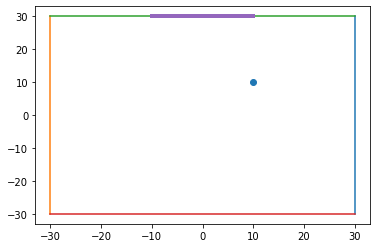

In [ ]:
plotGoal()

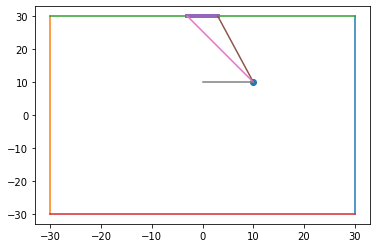

In [ ]:
##Angle Between first goal point to the bot Field of Vision (or Goal Area)
bot = (10,10)
a = 3
plotGoal(a=3)
plt.plot([a,bot[0]],[30,bot[1]])
plt.plot([-a,bot[0]],[30,bot[1]])
plt.plot([bot[0]-10,bot[0]],[bot[1],bot[1]])

In [ ]:
def dot(v1,v2):
    return v1[0]*v2[0]+v1[1]*v2[1]
def mag(a):
    return (a[0]**2+a[1]**2)**0.5

In [ ]:
def angle(x1,y1,x,y,x2,y2):
    v1 =[(x1-x),(y1-y)]
    v2 =[(x2-x),(y2-y)]
    return math.degrees(math.acos(dot(v1,v2)/(mag(v1)*mag(v2))))

In [ ]:
a = -3

In [ ]:
ans = 0
maxa = 0
for x in range(0,30):
    bot=(10,x)
    first = angle(bot[0]-10,bot[1],bot[0],bot[1],a,30)
    second = angle(bot[0]-10,bot[1],bot[0],bot[1],-a,30) 
    Angle = (second-first)
    if(Angle>maxa):
        maxa = Angle
        ans=x
        print("Max",end=" ")
    print("%0.2f %0.2f %0.2f"%(Angle,first,second))

Max 10.29 66.57 76.87
Max 10.58 65.85 76.43
Max 10.87 65.10 75.96
Max 11.18 64.29 75.47
Max 11.50 63.43 74.93
Max 11.83 62.53 74.36
Max 12.18 61.56 73.74
Max 12.55 60.52 73.07
Max 12.93 59.42 72.35
Max 13.32 58.24 71.57
Max 13.73 56.98 70.71
Max 14.16 55.62 69.78
Max 14.59 54.16 68.75
Max 15.03 52.59 67.62
Max 15.46 50.91 66.37
Max 15.90 49.09 64.98
Max 16.31 47.12 63.43
Max 16.70 45.00 61.70
Max 17.03 42.71 59.74
Max 17.29 40.24 57.53
Max 17.44 37.57 55.01
17.43 34.70 52.13
17.21 31.61 48.81
16.70 28.30 45.00
15.83 24.78 40.60
14.50 21.04 35.54
12.64 17.10 29.74
10.20 12.99 23.20
7.20 8.75 15.95
3.73 4.40 8.13


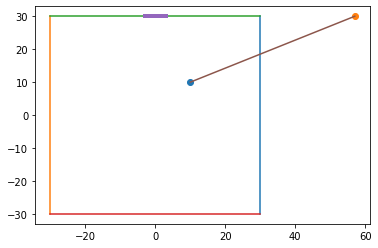

In [ ]:
bot = (10,10)
a = 3
plotGoal(a=a)
plt.scatter(60-a,30)
plt.plot([60-a,bot[0]],[30,bot[1]])

In [ ]:
## Computing Single Bounces
m = ((60-a-bot[0])/(30-bot[1]))
c = bot[1]-m*(bot[0]) 

In [ ]:
m,c

(2.35, -13.5)

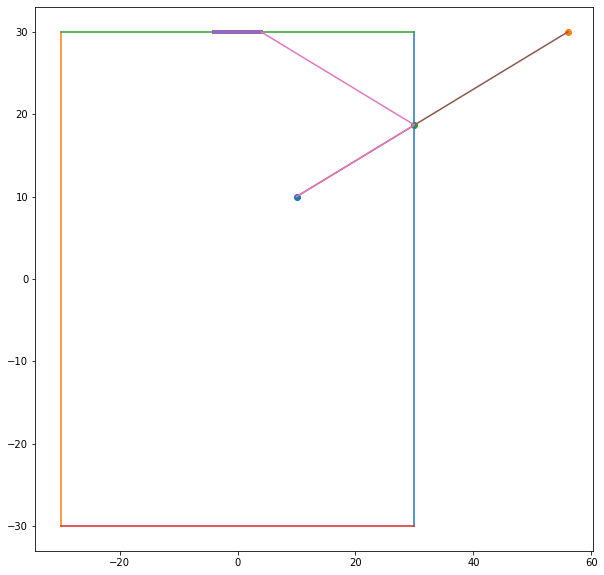

In [ ]:
bot = (10,10)
_ = plt.figure(figsize=(10,10))
def getBouncePoint(bot = (10,10),a = 4):
    m = ((30-bot[1])/(60-a-bot[0]))
    c = bot[1]-m*(bot[0]) 
    # y = ((30-c)/m)
    y = m*30 + c
    return y
plotGoal(a=a)
plt.scatter(60-a,30)
plt.plot([60-a,bot[0]],[30,bot[1]])
y = getBouncePoint(a=a)
plt.scatter(30,y)
plt.plot([bot[0],30,a],[bot[1],y,30])


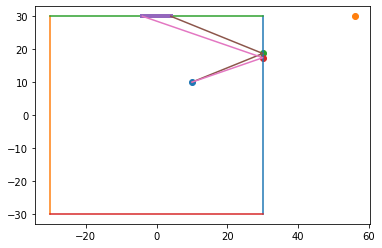

In [ ]:
bot = (10,10)
def getBouncePoint(bot = (10,10),a = 4):
    m = ((30-bot[1])/(60-a-bot[0]))
    c = bot[1]-m*(bot[0]) 
    # y = ((30-c)/m)
    y = m*30 + c
    return y
plotGoal(a=a)
plt.scatter(60-a,30)
# plt.plot([60-a,bot[0]],[30,bot[1]])
y = getBouncePoint(a=a)
plt.scatter(30,y)
plt.plot([bot[0],30,a],[bot[1],y,30])

y = getBouncePoint(a=-a)
plt.scatter(30,y)
plt.plot([bot[0],30,-a],[bot[1],y,30])

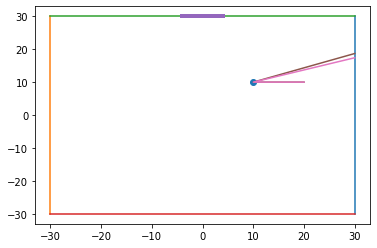

In [ ]:
y = getBouncePoint(a=a)
y2 = getBouncePoint(a=-a)
plotGoal(a=a)
a1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y))
plt.plot([bot[0]+10,bot[0],30],[bot[1],bot[1],y])
a2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y2))
plt.plot([bot[0]+10,bot[0],30],[bot[1],bot[1],y2])

In [ ]:
## CALCULATING THE BEST WITH BOUNCES


In [ ]:
a = 3
ans = 0
maxa = 0
h = []
g = []
i = []
p = []
q = []
for x in range(0,30):
    bot=(10,x)
    first = angle(bot[0]-10,bot[1],bot[0],bot[1],a,30)
    second = angle(bot[0]-10,bot[1],bot[0],bot[1],-a,30) 
    y = getBouncePoint(bot=(10,x),a=a)
    y2 = getBouncePoint(bot=(10,x),a=-a)
    a1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y))
    a2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y2))
    Angle = abs(second-first)+abs(a2-a1)
    if(Angle>maxa):
        maxa = Angle
        ans=x
        print("Max",end=" ")
    print("%0.2f %0.2f %0.2f"%(Angle,first,second))
    h.append(Angle)
    g.append(first)
    i.append(second)
    p.append(a1)
    q.append(a2)

Max 13.33 76.87 66.57
Max 13.56 76.43 65.85
Max 13.81 75.96 65.10
Max 14.06 75.47 64.29
Max 14.32 74.93 63.43
Max 14.59 74.36 62.53
Max 14.87 73.74 61.56
Max 15.16 73.07 60.52
Max 15.47 72.35 59.42
Max 15.79 71.57 58.24
Max 16.11 70.71 56.98
Max 16.44 69.78 55.62
Max 16.78 68.75 54.16
Max 17.13 67.62 52.59
Max 17.47 66.37 50.91
Max 17.80 64.98 49.09
Max 18.10 63.43 47.12
Max 18.38 61.70 45.00
Max 18.60 59.74 42.71
Max 18.74 57.53 40.24
Max 18.77 55.01 37.57
18.63 52.13 34.70
18.28 48.81 31.61
17.65 45.00 28.30
16.64 40.60 24.78
15.18 35.54 21.04
13.19 29.74 17.10
10.62 23.20 12.99
7.47 15.95 8.75
3.87 8.13 4.40


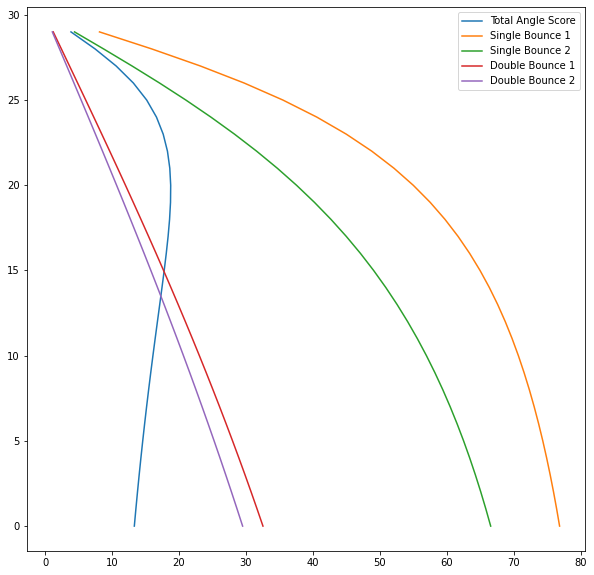

In [ ]:
_ = plt.figure(figsize=(10,10))
plt.plot(h,[x for x in range(len(h))])
plt.plot(g,[x for x in range(len(g))])
plt.plot(i,[x for x in range(len(i))])
plt.plot(p,[x for x in range(len(p))])
plt.plot(q,[x for x in range(len(q))])
# If this helps

plt.legend(["Total Angle Score","Single Bounce 1","Single Bounce 2","Double Bounce 1","Double Bounce 2"])

In [ ]:
## Two walls

In [ ]:
#UPDATED
def getBouncePoint(bot = (10,10),a = 4,w=30):
    m = ((30-bot[1])/(60-a-bot[0]))
    if(w==-30):
        m*=-1
    c = bot[1]-m*(bot[0]) 
    # y = ((30-c)/m)
    y = m*w + c
    return y

In [ ]:
a = 3
ans = 0
maxa = 0
h = []
g = []
i = []
p = []
q = []
for x in range(0,30):
    bot=(10,x)
    first = angle(bot[0]-10,bot[1],bot[0],bot[1],a,30)
    second = angle(bot[0]-10,bot[1],bot[0],bot[1],-a,30) 
    y = getBouncePoint(bot=(10,x),a=a)
    y2 = getBouncePoint(bot=(10,x),a=-a)
    a1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y))
    a2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y2))

    y = getBouncePoint(bot=(10,x),a=a,w=-30)
    y2 = getBouncePoint(bot=(10,x),a=-a,w=-30)
    b1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],-30,y))
    b2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],-30,y2))
    Angle = abs(second-first)+abs(a2-a1)+abs(b1-b2)
    if(Angle>maxa):
        maxa = Angle
        ans=x
        print("Max",end=" ")
    print("%0.2f %0.2f %0.2f"%(Angle,first,second))
    h.append(Angle)
    g.append(first)
    i.append(second)
    p.append(a1)
    q.append(a2)

Max 16.37 76.87 66.57
Max 16.55 76.43 65.85
Max 16.74 75.96 65.10
Max 16.94 75.47 64.29
Max 17.14 74.93 63.43
Max 17.34 74.36 62.53
Max 17.56 73.74 61.56
Max 17.78 73.07 60.52
Max 18.01 72.35 59.42
Max 18.25 71.57 58.24
Max 18.49 70.71 56.98
Max 18.73 69.78 55.62
Max 18.98 68.75 54.16
Max 19.23 67.62 52.59
Max 19.47 66.37 50.91
Max 19.69 64.98 49.09
Max 19.90 63.43 47.12
Max 20.06 61.70 45.00
Max 20.16 59.74 42.71
Max 20.19 57.53 40.24
20.09 55.01 37.57
19.84 52.13 34.70
19.36 48.81 31.61
18.59 45.00 28.30
17.46 40.60 24.78
15.87 35.54 21.04
13.74 29.74 17.10
11.03 23.20 12.99
7.75 15.95 8.75
4.01 8.13 4.40


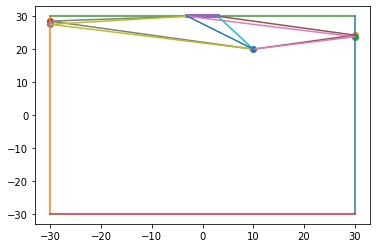

In [ ]:
bot = (10,20)
plotGoal(bot=bot,a=a)
# plt.scatter(60-a,30)
# plt.plot([60-a,bot[0]],[30,bot[1]])
y = getBouncePoint(bot=bot,a=a)
plt.scatter(30,y)
plt.plot([bot[0],30,a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=-a)
plt.scatter(30,y)
plt.plot([bot[0],30,-a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,-a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=-a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,-a],[bot[1],y,30])

plt.plot([bot[0],a],[bot[1],30])
plt.plot([bot[0],-a],[bot[1],30])

In [ ]:
print("Best coordinate for maximum probability is",ans,"with probability %0.3f%%"%((maxa*100)/180))

Best coordinate for maximum probability is 19 with probability 11.215%


## Double bounce Approach

In [ ]:
## I donot want to, it can be done by finding mirror image of bot and goal coordinates by the walls 
## Practically, it will not work because of the speed of the balls decreases due to restitution

## Other Answers to problems

### c) How does your answer for the optimal time change if the starting position of the robot changes from (10, 0) to (x, 0) and everything else remains the same ?


In [ ]:
ansX = 0
ansY = 0
for global_y in range(-28,28):
    for x in range(0,30):
        bot=(global_y,x)
        first = angle(bot[0]-10,bot[1],bot[0],bot[1],a,30)
        second = angle(bot[0]-10,bot[1],bot[0],bot[1],-a,30) 
        y = getBouncePoint(bot=bot,a=a)
        y2 = getBouncePoint(bot=bot,a=-a)
        a1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y))
        a2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y2))
        
        y = getBouncePoint(bot=bot,a=a,w=-30)
        y2 = getBouncePoint(bot=bot,a=-a,w=-30)
        b1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],-30,y))
        b2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],-30,y2))
        Angle = abs(second-first)+abs(a2-a1)+abs(b1-b2)
        # Angle = abs(second-first)+abs(a2-a1)
        if(Angle>maxa):
            maxa = Angle
            ansX=x
            ansY=global_y
        #     print("Max",end=" ")
        # print("%0.2f %0.2f %0.2f"%(Angle,first,second))

In [ ]:
print("Best coordinate for maximum probability is at(%d,%d)"%(ansX,ansY),"with probability %0.3f%%"%((maxa*100)/180))

Best coordinate for maximum probability is at(0,0) with probability 79.623%


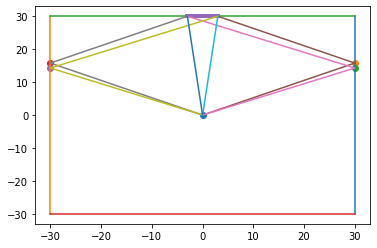

In [ ]:
bot = (0,0)
plotGoal(bot=bot,a=a)
# plt.scatter(60-a,30)
# plt.plot([60-a,bot[0]],[30,bot[1]])
y = getBouncePoint(bot=bot,a=a)
plt.scatter(30,y)
plt.plot([bot[0],30,a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=-a)
plt.scatter(30,y)
plt.plot([bot[0],30,-a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,-a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=-a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,a],[bot[1],y,30])

plt.plot([bot[0],a],[bot[1],30])
plt.plot([bot[0],-a],[bot[1],30])

### d)How does your answer for the optimal time change if the width of the goal increases, i.e. changes from (-3, 30), (3, 30) to (-a, 30), (a, 30), and everything else remains the same ?

In [ ]:
ansX = 0
ansY = 0
a = 10
for global_y in range(-29,28):
    for x in range(0,30):
        bot=(global_y,x)
        first = angle(bot[0]-10,bot[1],bot[0],bot[1],a,30)
        second = angle(bot[0]-10,bot[1],bot[0],bot[1],-a,30) 
        y = getBouncePoint(bot=bot,a=a)
        y2 = getBouncePoint(bot=bot,a=-a)
        a1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y))
        a2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],30,y2))
        y = getBouncePoint(bot=bot,a=a,w=-30)
        y2 = getBouncePoint(bot=bot,a=-a,w=-30)
        b1 = (angle(bot[0]+10,bot[1],bot[0],bot[1],-30,y))
        b2 = (angle(bot[0]+10,bot[1],bot[0],bot[1],-30,y2))
        Angle = abs(second-first)+abs(a2-a1)+abs(b1-b2)
        if(Angle>maxa):
            maxa = Angle
            ansX=x
            ansY=global_y

In [ ]:
print("Best coordinate for maximum probability is at(%d,%d)"%(ansX,ansY),"with probability %0.3f%% at a = 10"%((maxa*100)/180))

Best coordinate for maximum probability is at(29,0) with probability 94.019% at a = 10


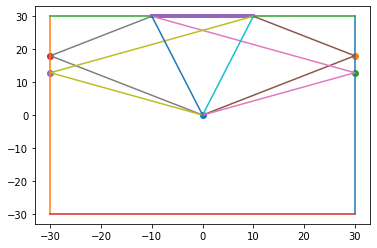

In [ ]:
a = 10
bot = (0,0)
plotGoal(bot=bot,a=a)
# plt.scatter(60-a,30)
# plt.plot([60-a,bot[0]],[30,bot[1]])
y = getBouncePoint(bot=bot,a=a)
plt.scatter(30,y)
plt.plot([bot[0],30,a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=-a)
plt.scatter(30,y)
plt.plot([bot[0],30,-a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,-a],[bot[1],y,30])

y = getBouncePoint(bot=bot,a=-a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,a],[bot[1],y,30])

plt.plot([bot[0],a],[bot[1],30])
plt.plot([bot[0],-a],[bot[1],30])

### e) Consider that there is now a ‘defending’ robot in the form of a line. The ‘line’ of this defending robot extends from (-3, 15) to (3, 15). (bang in front of the (-3, 30) to (3, 30) goal). Now our attacking robot decides to shoot from. What is the range of y-values along the two walls that the robot should shoot the ball in to score?


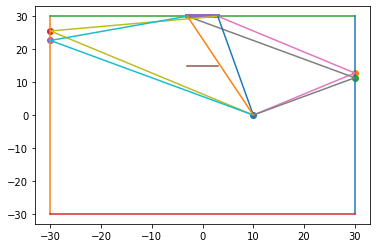

In [ ]:
a = 3
bot = (10,0)
plotGoal(bot=bot,a=a)
defender = plt.plot([-3,3],[15,15])

# plt.scatter(60-a,30)
# plt.plot([60-a,bot[0]],[30,bot[1]])
y1 = y = getBouncePoint(bot=bot,a=a)
plt.scatter(30,y)
plt.plot([bot[0],30,a],[bot[1],y,30])

y2 = y = getBouncePoint(bot=bot,a=-a)
plt.scatter(30,y)
plt.plot([bot[0],30,-a],[bot[1],y,30])

y3 = y = getBouncePoint(bot=bot,a=a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,a],[bot[1],y,30])

y4 = y = getBouncePoint(bot=bot,a=-a,w=-30)
plt.scatter(-30,y)
plt.plot([bot[0],-30,-a],[bot[1],y,30])

plt.plot([bot[0],a],[bot[1],30])
plt.plot([bot[0],-a],[bot[1],30])

In [ ]:
Range30=abs(y1-y2)
RangeM30=abs(y3-y4)
print("Range of y-values \nalong left wall are from "+str(y1)+" to "+str(y2)+" and \nalong right wall is from "+str(y3)+" to "+str(y4)+"\nTotal "+str(abs(y1-y2)+abs(y3-y4)))

Range of y-values 
along left wall are from 12.765957446808512 to 11.320754716981133 and 
along right wall is from 25.53191489361702 to 22.641509433962263
Total 4.335608189482137


### f) Can you create a simulation for the situation in part a with one modification - the user should be able to define a start coordinate for a robot along x - axis . Then an animation should run that shows the robot moving straight ahead from that point, shooting the ball at the optimal time, stopping and then printing the time.

In [ ]:
## Can be made through representation of the points of the lines in the form of bezier curve, so we have 3 values
## t,y,x where on putting t=0,1,2.. will give x and y values, thus no wasting brains on parametric lines.
##----------
## In python this can be done through moviepy (if any issues then ffmpeg) with frames as output images from 
## matplotlib